# Занятие 1. Pandas и основные понятия машинного обучения.






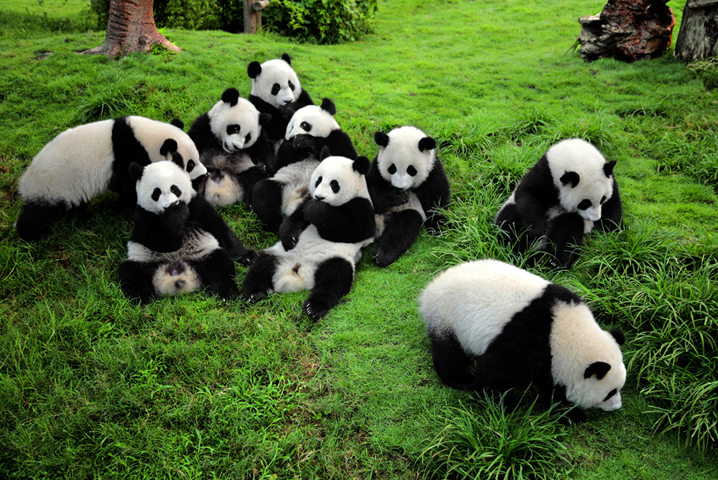

# План занятия

1. Загрузка и сохранение данных на диск, создание датафреймов
2. Работа со строками и столбцами датафрейма
3. Анализ и преобразование датафрейма
  - 3.1. Методы анализа
  - 3.2. Группировка данных   
4. Pandas в задачах машинного обучения
5. Постановка задачи мини-курса и загрузка данных
6. **Домашнее задание 1**

Библиотека Pandas - важная библиотека, с которой мы будем активно работать в курсе. Pandas $-$ это модуль для первичной работы с данными, с помощью которого можно проводить простой анализ и предобработку данных..

**Основные возможности:**
* удобное чтение и запись данных из .csv, .txt, .xls, SQL databases, HDF5;
* удобная работа с пропусками в данных;
* поиск, сортировка и выборка объектов, удовлетворяющих заданным критериям;
* возможности по соединению датасетов;
* красивая визуализация...

**Импорт библиотеки:**

In [ ]:
import pandas as pd

# 1. Загрузка данных и создание датафреймов

__Наиболее популярные форматы данных (при скачивании датасета из интернета)__:
* _.csv_ (comma separated file), _.tsv_ (tab separated file) - таблицы, записанные в текстовые файлы с простой структурой. Эти файлы можно открывать в обычном текстовом редакторе. Pandas позволяет считывать эти данные именно в формате таблицы.
* _.xls_ (eXceL Spreadsheet $-$ таблицы Microsoft)
* _.json_ (JavaScript Object Notation, используется для _сериализации_ структур языка, то есть сохранения сложных объектов, например, вложенных списков или словарей Python). Json-текст представляет собой либо набор пар ключ: значение, либо упорядоченный набор значений
* _.txt_ в иной специфичной для задачи форме (например, Vowpal Wabbit и UCI bag-of-words для <<мешка слов>>)

В pandas есть функции для считывания во всех этих форматах.

В реальной жизни данные хранятся в базах данных, откуда с помощью sql-подобных языков из них составляют файлы в указанных выше форматах.

__Чтение из csv с помощью pandas__:
[pandas.read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
У функции несколько параметров, основные необходимые:
* `filepath_or_buffer` (перый и единственный обязательный аргумент) --- имя файла
* `sep` $-$ разделитель (; , \t ...)
* `quotechar` $-$ символ кавычек, все что внутри считается за строку (разделители также могут входить в эту строку; ' " ...)
* `names` $-$ список названий колонок
* `header` $-$ номер строки файла (с 0), которую нужно считать заголовком
* `dtype` $-$ словарь, сопоставляющий именам колонок типы данных в них
* `na_values` $-$ строка/список/словарь (ключи $-$ названия колонок) строковых значений, которые нужно считать пропуском.

По умолчанию `names=None` и `header=0`, то есть названия колонок берутся из первой строки файла. Можно передать названия через `names`. 

Если вы не хотите давать названия, укажите `header=None`, тогда названия будут даны автоматически индексами с 0. Учтите, что названия нужны при дальнейшей работе с данными (если вы только не собираетесь взять оттуда только numpy-матрицу; в этом случае они не понадобятся). Следите за длиной списка названий, он должен совпадать с реальным числом колонок в файле (а в противном случае вы получите ошибки)! 

Чтобы заменить заголовки, записанные в файле, нужно установить `header=0` и передать `names`.

В функцию `pd.read_csv()` можно передавать как путь к файлу, хранящемуся на компьютере, так и ссылку на файл в Интернете.

Для чтения xls: [pandas.read_excel()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html)

Для чтения sql: [pandas.read_sql()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html)


Считывание данных:

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/CV_mini_course/main/Session1/main_data.csv")

Будем работать со следующим набором данных. Для кажого сотрудника некоторой фирмы имеется персональная информация, например, заработная плата (salary), опыт работы (work experience), бинарные закодированные персональные данные (code-1, code-2, code-3) и так далее.

Столбец grade - целевая переменная. Это оценка, полученная сотрудником в результате тестирования его компетенций.

**Посмотреть первые строки:**

In [ ]:
data.head()

,salary,work experience,code-1,code-2,married,code-3,sex,grade
0,5.73,30,0,0,1,1,f,4
1,4.28,28,0,0,1,0,f,3
2,7.96,35,0,0,0,0,f,4
3,11.57,38,0,0,1,1,m,3
4,11.42,27,0,0,1,0,m,3


In [ ]:
type(data)

pandas.core.frame.DataFrame

Переменная, которую возвращает функция чтения, ссылается на _датафрейм_; это основная структура данных в pandas. Его можно создать и вручную:

In [ ]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40], 'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


Если мы хотим сохранить таблицу на диск, это можно сделать так:

In [ ]:
df.to_csv("Filename.csv")

# 2. Работа со строками и столбцами датафрейма

Датафрейм - это таблица. **Названия строк:**

In [ ]:
data.index

RangeIndex(start=0, stop=1260, step=1)

**Названия столбов:**

In [ ]:
data.columns

Index(['salary', 'work experience', 'code-1', 'code-2', 'married', 'code-3',
       'sex', 'grade'],
      dtype='object')

**Полезный функционал:**
* параметр `df.dtypes` $-$ типы колонок
* метод [`df.fillna(value)`](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html), `value` $-$ на что заменить (скаляр или словарь с ключами-названиями колонок)
* методы `df.head([N])` и `df.tail([N])` $-$ показать N (необязательный аргумент) первых или последних значений
* параметры `df.index`, `df.columns` и `df.values` $-$ соответственно индексы строк датафрейма, названия колонок и np.array, составленный из значений датафрейма
* метод `df.T` $-$ транспонировать данные (поменять строки и столбцы местами)
* сортировка данных по индексу (по названиям строк) и по значениям колонки, например `df.sort_index(axis=1, ascending=False)` и `df.sort_values(by='B')`
* метод `df.copy()` $-$ копировать датафрейм

Все структуры данных, показываемые и возвращаемые pandas, имеют тип, придуманный разработчиками pandas (а не стандартный для Python список или словарь). Все эти типы имеют удобный интерфейс обращения к своим элементам (*индексация, slicing*), но иногда кажутся непривычными. Например, `df['smth']`, как указано выше, должен выдать колонку, имеющую название smth (если она существует в датафрейме).

В датафрейме могут храниться данные разных типов (главное, чтобы тип был один и тот же внутри колонки), например float, int, string.

**Выбор нескольких столбцов:**

In [ ]:
data[["salary", "work experience"]].head(5)

,salary,work experience
0,5.73,30
1,4.28,28
2,7.96,35
3,11.57,38
4,11.42,27


Мы можем **удалить какой-нибудь столбец** из датафрейма с помощью `.drop()`:

In [ ]:
data.drop("grade", axis=1).head()

,salary,work experience,code-1,code-2,married,code-3,sex
0,5.73,30,0,0,1,1,f
1,4.28,28,0,0,1,0,f
2,7.96,35,0,0,0,0,f
3,11.57,38,0,0,1,1,m
4,11.42,27,0,0,1,0,m


Обратите внимание, что столбец не удалился из датафрейма навсегда. Наоборот, результат нашей операции записан в выводе, и если бы мы хотели его сохранить, мы должны были бы присвоить результат операции новой переменной:

In [ ]:
X = data.drop("grade", axis=1)

**Индексация по строкам:**

In [ ]:
data.iloc[data.index % 2 == 0].head(5)

,salary,work experience,code-1,code-2,married,code-3,sex,grade
0,5.73,30,0,0,1,1,f,4
2,7.96,35,0,0,0,0,f,4
4,11.42,27,0,0,1,0,m,3
6,8.76,12,0,0,1,0,m,3
8,5.00,5,0,0,0,0,f,3


# 3. Анализ и преобразование датафрейма

## 3.1. Методы анализа данных в pandas

**Основная информация по датафрейму:**

In [ ]:
data.describe()

,salary,work experience,code-1,code-2,married,code-3,grade
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.073810,0.691270,0.273810,3.185714
std,4.660639,11.963485,0.445280,0.261564,0.462153,0.446089,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.707500,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,5.300000,15.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,7.695000,27.000000,1.000000,0.000000,1.000000,1.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000


По этим статистикам можно сделать различные выводы о данных, например:

> одинаковый ли масштаб имеют признаки (например, salary измеряется от 1 до 78, а code-1 в единицах - от 0 до 1).

> есть ли пропуски в данных (по **count**) - в этом наборе данных пропусков нет. 


**Основную статистическую информацию** о *категориальных* (нечисловых) столбцах можно получить так:

In [ ]:
data.describe(include = 'object')

,sex
count,1260
unique,2
top,m
freq,824


Можно **посмотреть на все уникальные значения в столбце:**

In [ ]:
set(data["grade"])

{1, 2, 3, 4, 5}

**Уникальные значения в столбце** и число строк с таким значением:

In [ ]:
data["grade"].value_counts()

3    722
4    364
2    142
5     19
1     13
Name: grade, dtype: int64

Перекодирование столбца с помощью метода `.map()`:

In [ ]:
data["sex"] = data["sex"].map({'m' : 1, 'f' : 0})

Метод `.apply()`: применение функции поэлементно к столбцу или строке (+ создание нового столбца или модификация исходного, потому что `apply` возвращает результат и никак не модифицирует датафрейм)

In [ ]:
# data["sex"] = data["sex"].apply(lambda x: 1 if x == 'm' else 0)

In [ ]:
data.head()

,salary,work experience,code-1,code-2,married,code-3,sex,grade
0,5.73,30,0,0,1,1,0,4
1,4.28,28,0,0,1,0,0,3
2,7.96,35,0,0,0,0,0,4
3,11.57,38,0,0,1,1,1,3
4,11.42,27,0,0,1,0,1,3


Можно создавать **новые столбцы** в таблице, например, так:

In [ ]:
data['great experience'] = (data['work experience'] > 25).astype(int)

Можно подклеить к текущей таблице другую таблицу (например, таблицу с дополнительными данными).

Для склейки таблиц в pandas есть методы [merge, join и concat](https://www.kaggle.com/residentmario/renaming-and-combining#Combining).

In [ ]:
additional = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/CV_mini_course/main/Session1/additional_data.csv")

data = pd.concat([data, additional], axis=1)
data.head()

,salary,work experience,code-1,code-2,married,code-3,sex,grade,great experience,intelligence level,health
0,5.73,30,0,0,1,1,0,4,1,14,good
1,4.28,28,0,0,1,0,0,3,1,12,good
2,7.96,35,0,0,0,0,0,4,1,10,good
3,11.57,38,0,0,1,1,1,3,1,16,good
4,11.42,27,0,0,1,0,1,3,1,16,good


In [ ]:
data["health"] = data["health"].apply(lambda x: 1 if x == 'good' else 0)

## 3.2. Группировка данных в pandas

Метод `.groupby()`: создание групп по значению какого-то столбца (или группы столбцов)

In [ ]:
data.groupby("sex")

Используя **группировку по столбцу**, мы можем, например, сравнить средний уровень здоровья у женщин и у мужчин:

In [ ]:
data.groupby("sex")['health'].apply(lambda x: x.mean())

sex
0    0.919725
1    0.940534
Name: health, dtype: float64

Или, например, выяснить у кого здоровье лучше: у людей в браке или у одиноких людей?

In [ ]:
data.groupby("married")["health"].mean()

married
0    0.938303
1    0.931114
Name: health, dtype: float64

Используя различные методы pandas можно отвечать и на более сложные вопросы, например, 

> "Какая доля среди замужних женщин имеет опыт работы больше 10 лет?"



In [ ]:
(data[(data['sex'] == 0) & (data['married'] == 1)]['work experience'] > 10).mean()

0.5821596244131455

Для анализа данных также удобно использовать *сводные таблицы*.

Сводная таблица - это удобный инструмент для обобщения и представления данных.

[Здесь](https://dfedorov.spb.ru/pandas/Сводная%20таблица%20в%20pandas.html) можно подробно почитать про сводные таблицы в pandas. 

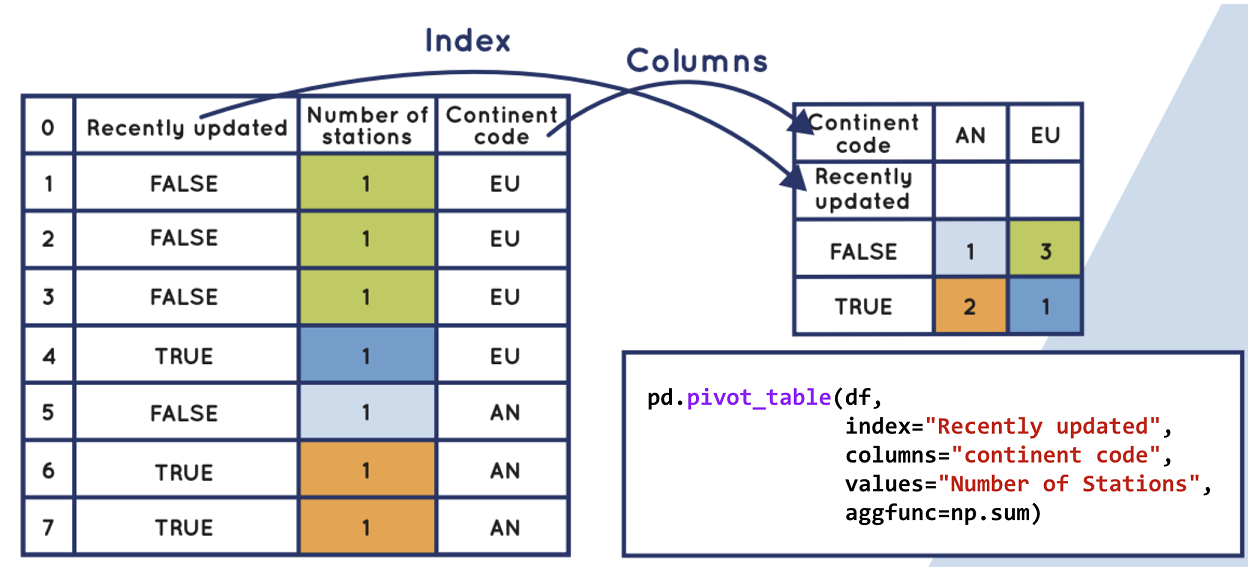

С помощью сводной таблицы можно, например, сделать группировку по нескольким столбцам (ниже - по столбцам sex и married) и посчитать агрегированные значения какой-либо (или каких-либо) переменной для каждой из групп.

In [ ]:
import numpy as np

pd.pivot_table(data, index=['sex','married'], values=['grade'], aggfunc=np.mean)

grade
sex married          
0   0        3.269058
    1        3.131455
1   0        3.228916
    1        3.164134

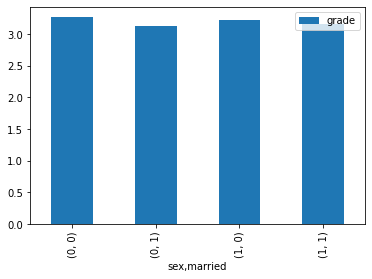

In [ ]:
pd.pivot_table(data, index=['sex','married'], values=['grade'], aggfunc=np.mean).plot(kind='bar', stacked=True)

А можно так.

In [ ]:
pd.pivot_table(data, index=['sex','health'], values=['grade','work experience'], aggfunc=[np.mean,np.min])

mean                  amin                
               grade work experience grade work experience
sex health                                                
0   0       3.114286       20.342857     2               3
    1       3.209476       13.600998     1               0
1   0       2.979592       26.775510     1               0
    1       3.189677       19.950968     1               1

# 4. Pandas в задачах машинного обучения

В машинном обучении библиотеку удобно использовать со следующей интерпретацией: 

*    по строкам датафрейма находятся *объекты*
*    по столбцам - *признаки* и *целевая переменная*. 

В нашем датафрейме целевая переменная задана в столбце *grade*. Если мы бы хотели выделить часть датафрейма без этого столбца, мы бы использовали такой код:

In [ ]:
X = data.drop('grade', axis=1)

Столбец с целевой переменной обычно называют *y* или *target*:

In [ ]:
y = data['grade']

In [ ]:
set(y)

{1, 2, 3, 4, 5}

В данной задаче целевая переменная принимает одно из пяти возможных значений. То есть мы имеем дело с задачей **пятиклассовой классификации**.

*    объекты в задаче - это люди (строки)
*    признаки - характеристики людей (стоят по столбцам)
*    целевая переменная - оценка (grade)

# 5. Постановка задачи мини-курса и загрузка данных

В нашем курсе мы будем решать задачу определения того, кто (какой именно человек) изображен на фотографии. Фотографии будете делать вы, участники курса :) 

То есть мы будем решать задачу **классификации**.

*    объекты в задаче - это фотографии (одна фотография это один объект)
*    признаки в задаче - это пиксели на фотографиях (точнее, интенсивность белого цвета каждого пикселя в случае черно-белых фотографий).

Первым заданием нашего курса будет создание набора данных для решения задачи (другими словами, вам надо будет себя пофотографировать и выложить фотографии в общую папку :), расскажем ниже подробнее). 

А сейчас покажем, как загружать готовые фотографии из папки.

В этом примере у нас есть 4 папки на Google Drive, с названиями class1, class2, class3, class4 - в каждой папке находятся фотографии одного из четырех людей.

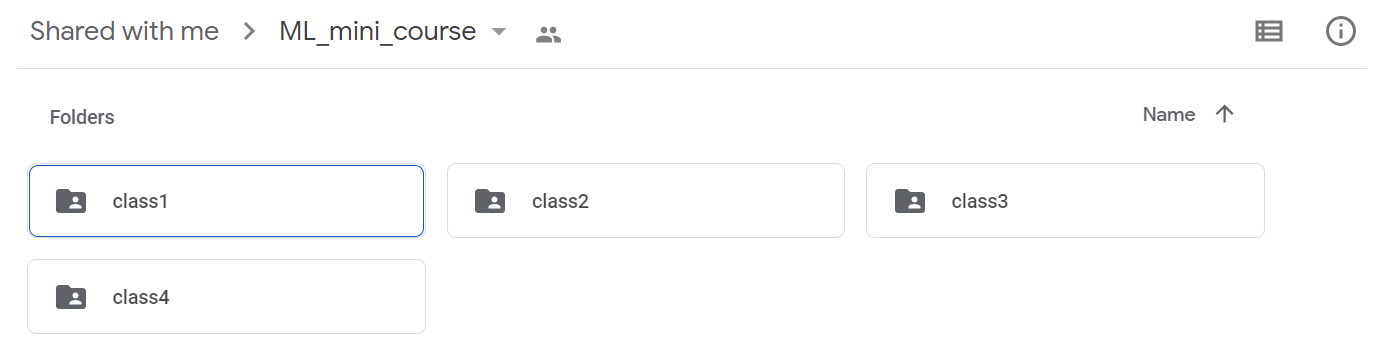

Подключимся к Google Drive.

In [ ]:
import glob
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


Считаем фотографии из папок, а заодно сделаем следующие преобразования изображений:

*    приведем изображения к черно-белому формату
*    все изображения переведем к размеру 64x64 пикселя

Создадим список X - в нём будут храниться наши *объекты*, то есть изображения, и список y с ответами (labels).

In [ ]:
import os
import cv2

dirname = "/gdrive/My Drive/ML_mini_course"
labels = ['class1', 'class2', 'class3', 'class4']

X, y = [], []

for label in labels:
    
    subdir = os.path.join(dirname, label)
    filelist = os.listdir(subdir)
    
    for fname in filelist:
        img = cv2.imread(os.path.join(subdir, fname), cv2.IMREAD_GRAYSCALE)
        
        h, w = img.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = img[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
        X.append(img)
        y.append(label)
len(X), len(y)

(209, 209)

Нарисуем первые несколько изображений:

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


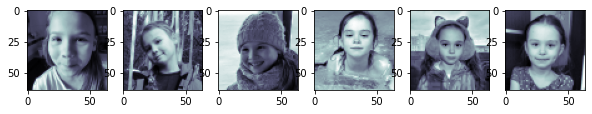

In [ ]:
from matplotlib import pylab as plt
%pylab inline

fig, axx = plt.subplots(1, 6, figsize=(10, 5))

for i in range(6):
    img = X[20*i]
    axx[i].imshow(img, cmap='bone') 

# 6. Домашнее задание 1

**Шаг 1:** 
К **17 июня 12:00** вам нужно сфотографировать себя 50 раз (или больше), полученные фотографии загрузить в [эту папку](https://drive.google.com/drive/folders/1UYEsgcoI5zpZylaLXmoJvylcwiLC9Lie?usp=sharing):

*    в папке по ссылке создайте папку и назовите её своей фамилией или как угодно ещё
*    в созданную папку загрузите свои фотографии

Примеры фотографий (из открытых источников):

Удачная фотография (человек по центру, смотрит в камеру, четкое фото):


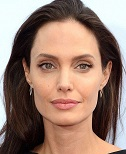

Неудачная фотография (человек не по центру / не смотрит в камеру / размытое фото и т.д.):

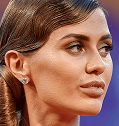

После этого добавьте ярлык папки по ссылке выше себе на Google Drive. 

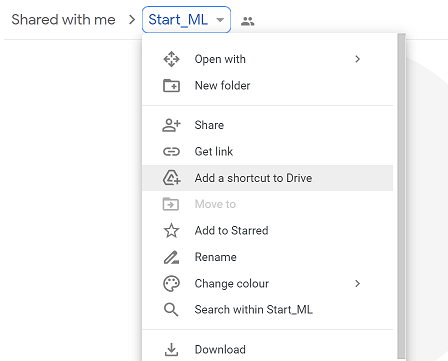

**Шаг 2:**
Выберите папки с фотографиями трех-четырех человек и попробуйте загрузить эти фотографии с помощью кода выше. Проверьте, что всё работает!

**Шаг 3 (Бонус):** бонусное задание по библиотеке Pandas [здесь](https://github.com/Murcha1990/CV_mini_course/blob/main/Session1/bonus_task.ipynb), а данные для этого задания [здесь](https://github.com/Murcha1990/CV_mini_course/blob/main/Session1/Data.zip).
